In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
import scipy.stats
from sklearn.metrics import precision_recall_fscore_support
import matplotlib.pyplot as plt
import seaborn as sns


### Dataset
the dataset is released by Kory Becker on Kaggle under CC BY-NC-SA 4.0 License.
* meanfreq : mean frequency (in kHz)
* sd : standard deviation of frequency
* median : median frequency (in kHz)
* Q25 : first quantile (in kHz)
* Q75 : third quantile (in kHz)
* IQR : interquantile range (in kHz)
* skew : skewness
* kurt : kurtosis
* sp.ent : spectral entropy
* sfm : spectral flatness
* mode : mode frequency
* centroid : frequency centroid
* meanfun : average of fundamental frequency measured across acoustic signal
* minfun : minimum fundamental frequency measured across acoustic signal
* maxfun : maximum fundamental frequency measured across acoustic signal
* meandom : average of dominant frequency measured across acoustic signal
* mindom : minimum of dominant frequency measured across acoustic signal
* maxdom : maximum of dominant frequency measured across acoustic signal
* dfrange : range of dominant frequency measured across acoustic signal
* modindx : modulation index. Calculated as the accumulated absolute difference between adjacent measurements of fundamental frequencies divided by the frequency range
* label : male or female

In [100]:
data = pd.read_csv("voiceDataSet.csv")

data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


### Data columns features

In [98]:
data.columns


Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')

In [22]:
data.groupby("label").count()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
label,,,,,,,,,,,,,,,,,,,,
female,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584
male,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584


Encoding the label column. Female to 0 and male to 1

In [23]:
class_mapping = {label: idx for idx, label in enumerate(np.unique(data['label']))}
class_mapping

{'female': 0, 'male': 1}

In [24]:
data['label'] = data['label'].map(class_mapping)


# Correlation between the features and the Target label

<AxesSubplot:>

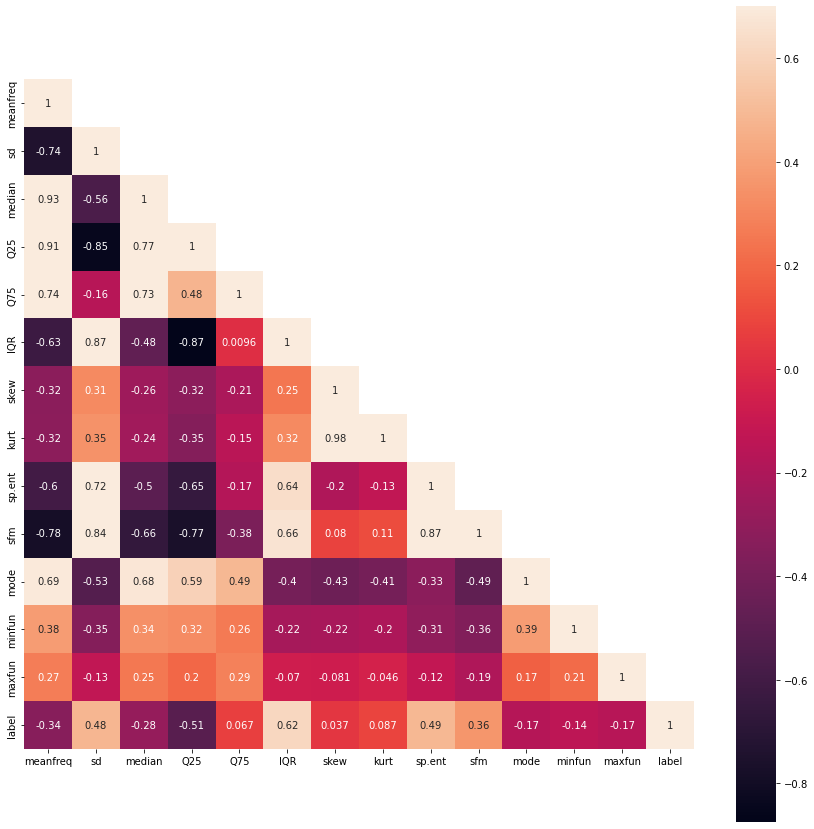

In [102]:
correlation_map = df.corr()
obj = np.array(correlation_map)
obj[np.tril_indices_from(obj)] = False
fig,ax= plt.subplots()
fig.set_size_inches(15,15)
sns.heatmap(correlation_map, mask=obj,vmax=.7, square=True,annot=True)

# Feature Importance

# splitting the dataset into training and testing

In [26]:
#Creating X,y and splitting the dataset into training and testing

from sklearn.model_selection import train_test_split

X, y = data.iloc[:, :-1].values, data.iloc[:, -1].values

X_train, X_test, y_train, y_test =\
    train_test_split(X, y, 
                     test_size=0.3, 
                     random_state=0, 
                     stratify=y)

# without any standardization or normalization

### Logistic Regression

In [30]:
logit = LogisticRegression()
logit.fit(X_train, y_train)

print("Logistic Regression")
print("Accuracy on training set: {:.3f}".format(logit.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(logit.score(X_test, y_test)))

y_pred_logit = logit.predict(X_test)

precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred_logit, average='micro')
print("Precision, Recall and fscore:",precision, recall, fscore,)


Logistic Regression
Accuracy on training set: 0.908
Accuracy on test set: 0.912
Precision, Recall and fscore: 0.9116719242902208 0.9116719242902208 0.9116719242902208


C:\Users\TOSHIBA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Decision Tree

In [33]:
tree = DecisionTreeClassifier(random_state=0,max_depth=4)
tree.fit(X_train, y_train)

print("Decision Tree")
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

y_pred_tree = tree.predict(X_test)

precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred_tree, average='micro')
print("Precision, Recall and fscore:",precision, recall, fscore,)

Decision Tree
Accuracy on training set: 0.983
Accuracy on test set: 0.961
Precision, Recall and fscore: 0.961093585699264 0.961093585699264 0.961093585699264


## support vector machine model

In [35]:
svm = SVC()
svm.fit(X_train, y_train)

print("Support Vector Machine")
print("Accuracy on training set: {:.3f}".format(svm.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(svm.score(X_test, y_test)))

y_pred_sm = svm.predict(X_test)

precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred_sm, average='micro')
print("Precision, Recall and fscore:",precision, recall, fscore,)

Support Vector Machine
Accuracy on training set: 0.664
Accuracy on test set: 0.680
Precision, Recall and fscore: 0.6803364879074658 0.6803364879074658 0.6803364879074658


### Random Forest Classifier

In [44]:
model = RandomForestClassifier(n_estimators = 12 , max_depth = 3)
model.fit(X_train, y_train)


print("Random Forest Classifier")
print("Accuracy on training set: {:.3f}".format(model.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(model.score(X_test, y_test)))

y_pred_sm = model.predict(X_test)

precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred_sm, average='micro')
print("Precision, Recall and fscore:",precision, recall, fscore,)

Random Forest Classifier
Accuracy on training set: 0.966
Accuracy on test set: 0.948
Precision, Recall and fscore: 0.9484752891692955 0.9484752891692955 0.9484752891692955


#  Standardizing the data for greater performance

In [45]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

## logistic regression model

In [47]:
logit = LogisticRegression()
logit.fit(X_train_std, y_train)

print("Logistic Regression")
print("Accuracy on training set: {:.3f}".format(logit.score(X_train_std, y_train)))
print("Accuracy on test set: {:.3f}".format(logit.score(X_test_std, y_test)))

y_pred_logit = logit.predict(X_test_std)

precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred_logit, average='micro')
print("Precision, Recall and fscore:",precision, recall, fscore,)


Logistic Regression
Accuracy on training set: 0.978
Accuracy on test set: 0.965
Precision, Recall and fscore: 0.9652996845425867 0.9652996845425867 0.9652996845425867


## decision tree model

In [50]:
tree = DecisionTreeClassifier(random_state=0,max_depth=4)
tree.fit(X_train_std, y_train)

print("Decision Tree")
print("Accuracy on training set: {:.3f}".format(tree.score(X_train_std, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test_std, y_test)))

y_pred_tree = tree.predict(X_test_std)

precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred_tree, average='micro')
print("Precision, Recall and fscore:",precision, recall, fscore,)

Decision Tree
Accuracy on training set: 0.983
Accuracy on test set: 0.961
Precision, Recall and fscore: 0.961093585699264 0.961093585699264 0.961093585699264


## Random forest model

In [51]:
forest = RandomForestClassifier(n_estimators = 12 , max_depth = 3)
forest.fit(X_train_std, y_train)

print("Random Forest")
print("Accuracy on training set: {:.3f}".format(forest.score(X_train_std, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test_std, y_test)))

y_pred_forest = forest.predict(X_test_std)

precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred_forest, average='micro')
print("Precision, Recall and fscore:",precision, recall, fscore,)

Random Forest
Accuracy on training set: 0.969
Accuracy on test set: 0.948
Precision, Recall and fscore: 0.9484752891692955 0.9484752891692955 0.9484752891692955


# Feature Importance

In [55]:
print(forest.feature_importances_)


[2.44825178e-02 1.19297422e-03 2.66021155e-02 1.44125194e-01
 1.03869166e-04 1.51305529e-01 9.03902851e-05 3.23509121e-04
 3.28413937e-02 3.13874622e-02 4.17932874e-03 1.65978300e-02
 5.44623696e-01 8.46324144e-04 0.00000000e+00 5.06989420e-03
 1.57567425e-02 0.00000000e+00 3.47424827e-04 1.23804544e-04]


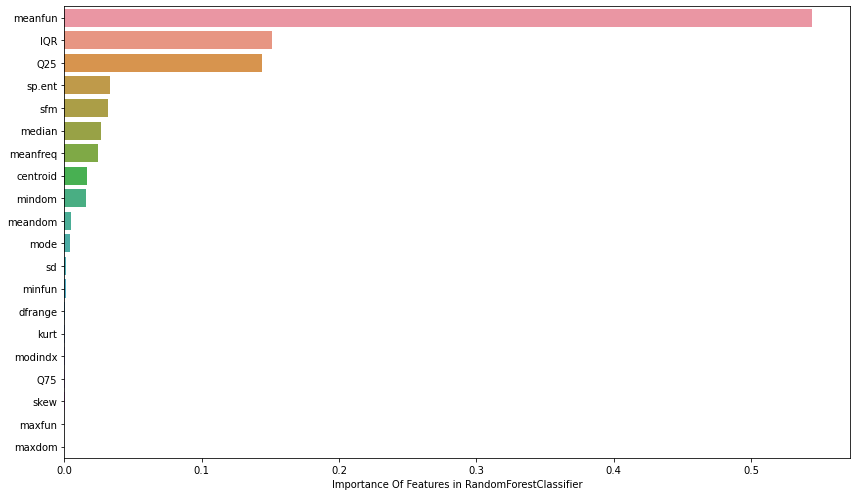

In [57]:
ranks = np.argsort(-forest.feature_importances_)
f, ax = plt.subplots(figsize=(12, 7))
sns.barplot(x=forest.feature_importances_[ranks], y=data.columns.values[ranks], orient='h')
ax.set_xlabel("Importance Of Features in RandomForestClassifier")
plt.tight_layout()
plt.show()

## support vector machine model

In [53]:
svm = SVC()
svm.fit(X_train_std, y_train)

print("Support Vector Machine")
print("Accuracy on training set: {:.3f}".format(svm.score(X_train_std, y_train)))
print("Accuracy on test set: {:.3f}".format(svm.score(X_test_std, y_test)))

y_pred_sm = svm.predict(X_test_std)

precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred_sm, average='micro')
print("Precision, Recall and fscore:",precision, recall, fscore,)

Support Vector Machine
Accuracy on training set: 0.989
Accuracy on test set: 0.974
Precision, Recall and fscore: 0.9737118822292324 0.9737118822292324 0.9737118822292324


# XGB Classifier 

In [71]:
xgb = XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.05)
xgb.fit(X_train_std, y_train)


print("Support Vector Machine")
print("Accuracy on training set: {:.3f}".format(xgb.score(X_train_std, y_train)))
print("Accuracy on test set: {:.3f}".format(xgb.score(X_test_std, y_test)))

y_pred_sm = xgb.predict(X_test_std)

precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred_sm, average='micro')
print("Precision, Recall and fscore:",precision, recall, fscore,)

C:\Users\TOSHIBA\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:18:27] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Support Vector Machine
Accuracy on training set: 0.832
Accuracy on test set: 0.579
Precision, Recall and fscore: 0.5793901156677181 0.5793901156677181 0.5793901156677181


# Feature Important

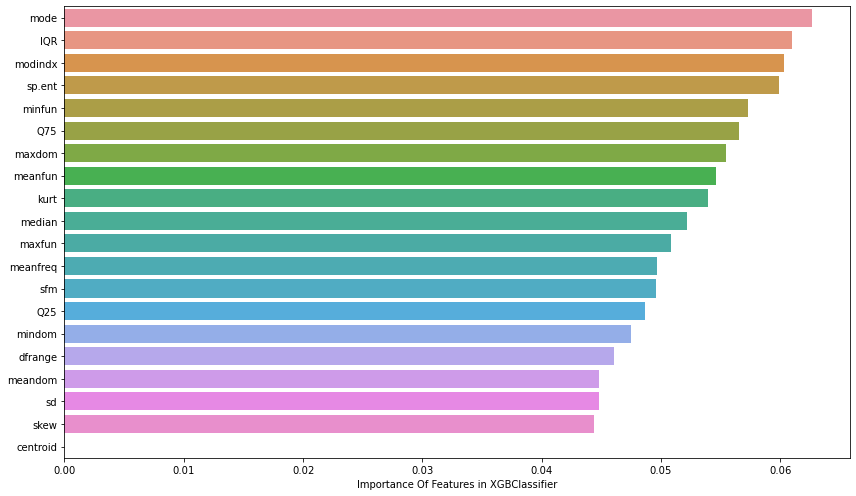

In [73]:
ranks = np.argsort(-xgb.feature_importances_)
f, ax = plt.subplots(figsize=(12, 7))

sns.barplot(x=xgb.feature_importances_[ranks], y=data.columns.values[ranks], orient='h')
ax.set_xlabel("Importance Of Features in XGBClassifier")
plt.tight_layout()
plt.show()

# Testing with Real audio clips wav files
#### I will remove some features from the dataset due to the correlation with other features and some other could not calculate it using python
### Pythonسأزيل بعض الميزات من مجموعة البيانات نظرًا لارتباطها بميزات أخرى والبعض الاخر  لم أتمكن من حسابها باستخدام 
لذلك سوف أقوم بتدريب النموذج بهذه الميزات واختبار النموذج المدرب بمقاطع صوتية حقيقية

سنعتمد الان في التدريب على الميزات التالية :

* meanfreq : mean frequency (in kHz)
* sd : standard deviation of frequency
* median : median frequency (in kHz)
* Q25 : first quantile (in kHz)
* Q75 : third quantile (in kHz)
* IQR : interquantile range (in kHz)
* skew : skewness
* kurt : kurtosis
* sfm : spectral flatness
* mode : mode frequency

## Drop unwanted features 

In [130]:
data_droped_features = data.drop(['centroid', 'modindx', 'dfrange', 'maxdom', 'mindom', 'meandom', 'meanfun', 'minfun', 'maxfun'], axis=1)


In [131]:
X_Dropped, y_Dropped = data_droped_features.iloc[:, :-1].values, data.iloc[:, -1].values

X_train_Dropped, X_test_Dropped, y_train_Dropped, y_test_Dropped =\
    train_test_split(X_Dropped, y_Dropped, 
                     test_size=0.3, 
                     random_state=0, 
                     stratify=y)

stdsc_Dropped = StandardScaler()
X_train_std_Dropped = stdsc.fit_transform(X_train_Dropped)
X_test_std_Dropped = stdsc.transform(X_test_Dropped)


# SVM model

In [132]:
svm = SVC()
svm.fit(X_train_std_Dropped, y_train_Dropped)

print("Support Vector Machine")
print("Accuracy on training set: {:.3f}".format(svm.score(X_train_std_Dropped, y_train_Dropped)))
print("Accuracy on test set: {:.3f}".format(svm.score(X_test_std_Dropped, y_test_Dropped)))

y_pred_sm = svm.predict(X_test_std_Dropped)

precision, recall, fscore, support = precision_recall_fscore_support(y_test_Dropped, y_pred_sm, average='micro')
print("Precision, Recall and fscore:",precision, recall, fscore,)

Support Vector Machine
Accuracy on training set: 0.950
Accuracy on test set: 0.940
Precision, Recall and fscore: 0.9400630914826499 0.9400630914826499 0.9400630914826499


In [164]:
def feature_freq_extraction(x):
    freqs = np.fft.fftfreq(x.size)
    mean = np.mean(freqs)
    std = np.std(freqs) 
    maxv = np.amax(freqs) 
    minv = np.amin(freqs) 
    median = np.median(freqs)
    skew = scipy.stats.skew(freqs)
    kurt = scipy.stats.kurtosis(freqs)
    q1 = np.quantile(freqs, 0.25)
    q3 = np.quantile(freqs, 0.75)
    mode = scipy.stats.mode(freqs)[0][0]
    iqr = scipy.stats.iqr(freqs)
    
    return [mean, std, maxv, minv, median, skew, kurt, q1, q3, mode, iqr]

In [167]:
import scipy.io.wavfile as wav


(rate, sig) = wav.read('test2-M.wav')

real_voice_test = feature_freq_extraction(sig)


y_predicted = svm.predict([real_voice_test])
print("Predicted:" ,y_predicted[0] , "the true label is: Male")

Predicted: male the true label is: Male


In [169]:
(rate, sig) = wav.read('test1-F.wav')

real_voice_test = feature_freq_extraction(sig)

y_predicted = svm.predict([real_voice_test])
print("Predicted:" ,y_predicted[0] , "the true label is: Female")


Predicted: male the true label is: Female


In [170]:
(rate, sig) = wav.read('test3-M.wav')

real_voice_test = feature_freq_extraction(sig)

y_predicted = svm.predict([real_voice_test])
print("Predicted:" ,y_predicted[0] , "the true label is: Male")



Predicted: male the true label is: Male
